## 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Import data

In [4]:
path = r'C:\Users\Niklas Winter\Layoffs Analyse'

In [5]:
# 2.Importing data set Layoffs
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'layoffs_clean.csv'))


In [6]:
# 2.Importing data set Layoffs_num
df_num = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'layoffs_num.csv'))


In [7]:
df.head()

,Unnamed: 0,Company,Location,Industry,Laid_Off_Count,Date,Stage,Country,Percentage
0,0,GoTo Group,Jakarta,Transportation,600.0,2023-03-10,Post-IPO,Indonesia,0.18
1,1,Xero,Wellington,Finance,800.0,2023-03-09,Post-IPO,New Zealand,0.15
2,2,Shopee,Jakarta,Food,200.0,2023-03-09,Unknown,Indonesia,0.18
3,3,Gopuff,Philadelphia,Food,100.0,2023-03-09,Series H,United States,0.02
4,4,Wave Financial,Toronto,Finance,50.0,2023-03-09,Acquired,Canada,0.18


In [8]:
df = df.drop(columns = ['Unnamed: 0'])

## 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
# Cut out all non-numerical values
df_num = df_num.select_dtypes(include='number')


In [12]:
df_num.head()

,Unnamed: 0,Location,Industry,Laid_Off_Count,Country,Percentage
0,0,79,27,600.0,23,0.18
1,1,185,7,800.0,35,0.15
2,2,79,9,200.0,23,0.18
3,3,135,9,100.0,56,0.02
4,4,175,7,50.0,7,0.18


In [13]:
df_num = df_num.drop(columns = ['Unnamed: 0'])

In [15]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-977339656.4663329,
 -290756021.9199096,
 -123825576.36167124,
 -74904455.72848676,
 -52961278.809605114,
 -35737495.17210727,
 -28904277.574304733,
 -24025554.458298028,
 -20084316.671580944]

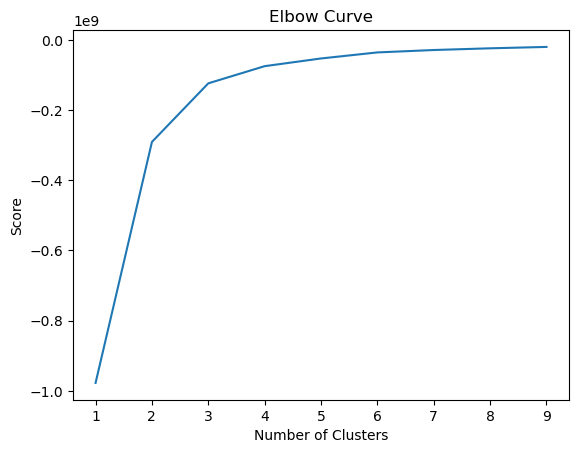

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### k-means clustering: I would choose 3 clusters - the curve jumps rapidly from two to three on the x-axis, then rises only slightly after 3, so 3 is a good number.

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)



In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

KMeans(n_clusters=3)

In [21]:
df_num['clusters'] = kmeans.fit_predict(df_num)

In [22]:
df_num.head()

,Location,Industry,Laid_Off_Count,Country,Percentage,clusters
0,79,27,600.0,23,0.18,0
1,185,7,800.0,35,0.15,0
2,79,9,200.0,23,0.18,0
3,135,9,100.0,56,0.02,0
4,175,7,50.0,7,0.18,0


In [23]:
df_num['clusters'].value_counts()

0    2295
2      42
1       9
Name: clusters, dtype: int64

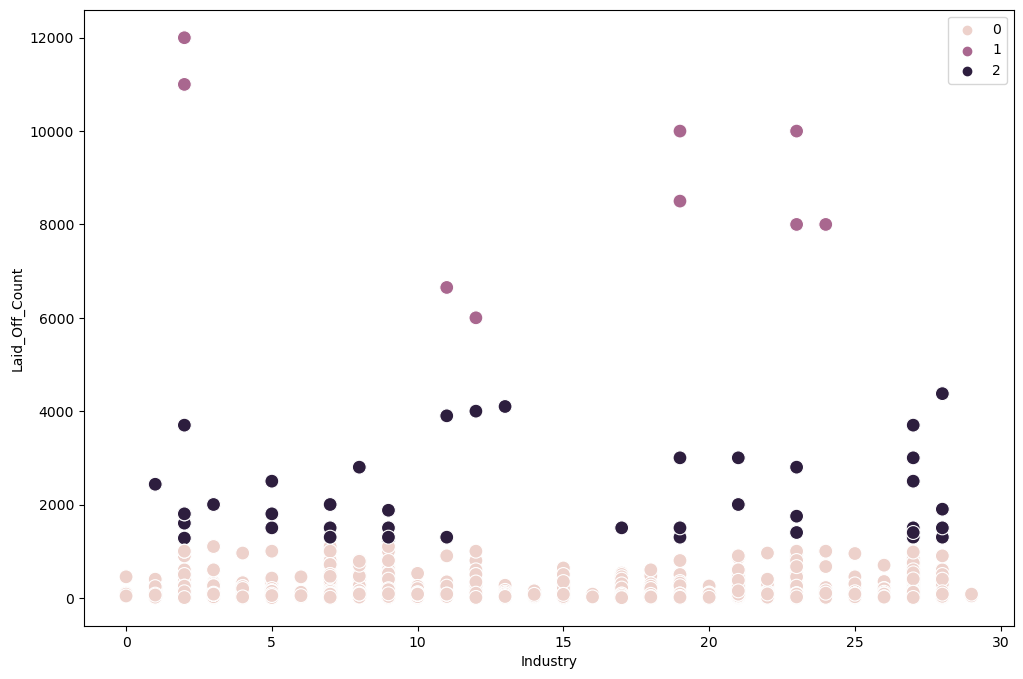

In [25]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Industry'], y=df_num['Laid_Off_Count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Industry') # Label x-axis.
plt.ylabel('Laid_Off_Count') # Label y-axis.
plt.show()

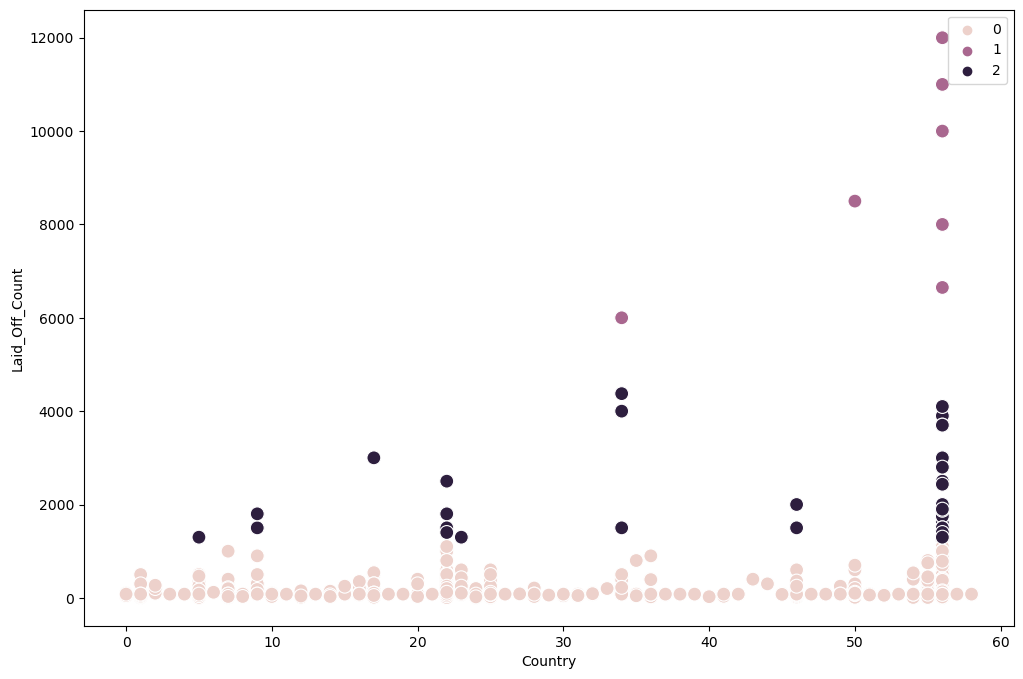

In [26]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Country'], y=df_num['Laid_Off_Count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Country') 
plt.ylabel('Laid_Off_Count') 
plt.show()

### Observation: Tendency of a cluster at around country 57.

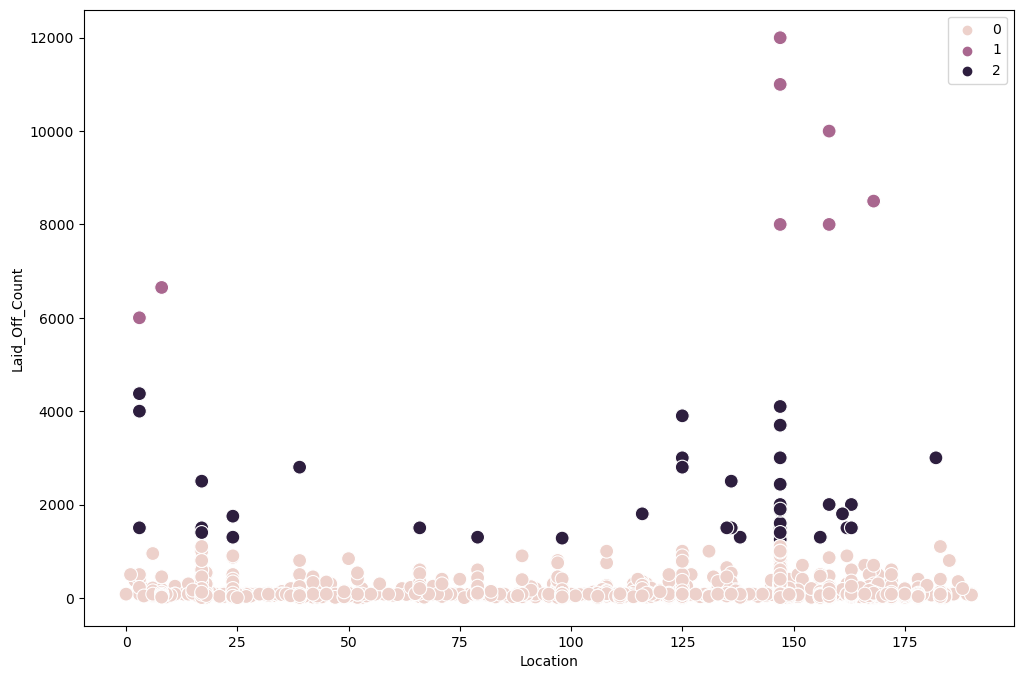

In [29]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Location'], y=df_num['Laid_Off_Count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Location') 
plt.ylabel('Laid_Off_Count') 
plt.show()

### Observation: A cluster tendency between locations 150 - 175. However, in this area can also be found the biggest outliers (United States).

In [27]:
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df_num.groupby('cluster').agg({'Industry':['mean', 'median'], 
                         'Country':['mean', 'median'], 
                         'Location':['mean', 'median'],
                          'Laid_Off_Count':['mean', 'median']})

Industry           Country           Location         \
                  mean median       mean median        mean median   
cluster                                                              
dark purple  14.738095   12.5  43.928571   56.0  112.976190  142.5   
pink         14.384749   13.0  44.357298   56.0  112.708932  125.0   
purple       15.000000   19.0  52.888889   56.0  121.555556  147.0   

            Laid_Off_Count          
                      mean  median  
cluster                             
dark purple    2130.142857  1800.0  
pink            118.359913    80.0  
purple         8905.555556  8500.0

### Discussion: In general, clusters are a great way to quickly identify patterns and correlations between variables and their impact. However, in my dataset it is not making too much sense because of the lack of sufficient continuos / numerical variables. To perform the analyse at all, I had to change several qualitative columns to numerical values. Nevertheless, clustering is a powerful tool to identify trends and connections between various numbers of variables.